In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Data/CarPrices.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Encode categorical data as numerical

# Using a custom map for doornumbers because I want to map two to 2 and four to 4
doornumber_map = {'two': 2, 'four': 4}
df['numerical_doornumber'] = df['doornumber'].map(doornumber_map)

# Using a custom map for cylinder numbers as well
cylindernumber_map = {'two': 2, 'three': 3,'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['numerical_cylindernumber'] = df['cylindernumber'].map(cylindernumber_map)

# Using LabelEncoder for the rest
encoder = LabelEncoder()

to_be_numerically_encoded = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype']

for feature in to_be_numerically_encoded:
    df[f'numerical_{feature}'] = encoder.fit_transform(df[feature])

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,price,numerical_doornumber,numerical_cylindernumber,numerical_fueltype,numerical_aspiration,numerical_carbody,numerical_drivewheel,numerical_enginelocation,numerical_fuelsystem,numerical_enginetype
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,13495.0,2,4,1,0,0,2,0,5,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,16500.0,2,4,1,0,0,2,0,5,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,16500.0,2,6,1,0,2,2,0,5,5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,13950.0,4,4,1,0,3,1,0,5,3
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,17450.0,4,5,1,0,3,0,0,5,3


In [6]:
# Drop the columns that have been numerically encoded
df.drop(to_be_numerically_encoded + ['doornumber', 'cylindernumber'], inplace=True, axis=1)

In [7]:
df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,price,numerical_doornumber,numerical_cylindernumber,numerical_fueltype,numerical_aspiration,numerical_carbody,numerical_drivewheel,numerical_enginelocation,numerical_fuelsystem,numerical_enginetype
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,13495.0,2,4,1,0,0,2,0,5,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,16500.0,2,4,1,0,0,2,0,5,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,16500.0,2,6,1,0,2,2,0,5,5
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,13950.0,4,4,1,0,3,1,0,5,3
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,17450.0,4,5,1,0,3,0,0,5,3


In [8]:
# Drop the CarName Column
df.drop('CarName', inplace=True, axis=1)
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,price,numerical_doornumber,numerical_cylindernumber,numerical_fueltype,numerical_aspiration,numerical_carbody,numerical_drivewheel,numerical_enginelocation,numerical_fuelsystem,numerical_enginetype
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,13495.0,2,4,1,0,0,2,0,5,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,16500.0,2,4,1,0,0,2,0,5,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,16500.0,2,6,1,0,2,2,0,5,5
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,13950.0,4,4,1,0,3,1,0,5,3
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,17450.0,4,5,1,0,3,0,0,5,3


In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,price,numerical_doornumber,numerical_cylindernumber,numerical_fueltype,numerical_aspiration,numerical_carbody,numerical_drivewheel,numerical_enginelocation,numerical_fuelsystem,numerical_enginetype
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,...,13276.710571,3.121951,4.380488,0.902439,0.180488,2.614634,1.326829,0.014634,3.253659,3.014634
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,...,7988.852332,0.994966,1.080854,0.297446,0.385535,0.859081,0.556171,0.120377,2.013204,1.054765
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,5118.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,...,7788.000000,2.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,10295.000000,4.000000,4.000000,1.000000,0.000000,3.000000,1.000000,0.000000,5.000000,3.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,...,16503.000000,4.000000,4.000000,1.000000,0.000000,3.000000,2.000000,0.000000,5.000000,3.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,45400.000000,4.000000,12.000000,1.000000,1.000000,4.000000,2.000000,1.000000,7.000000,6.000000


<Axes: >

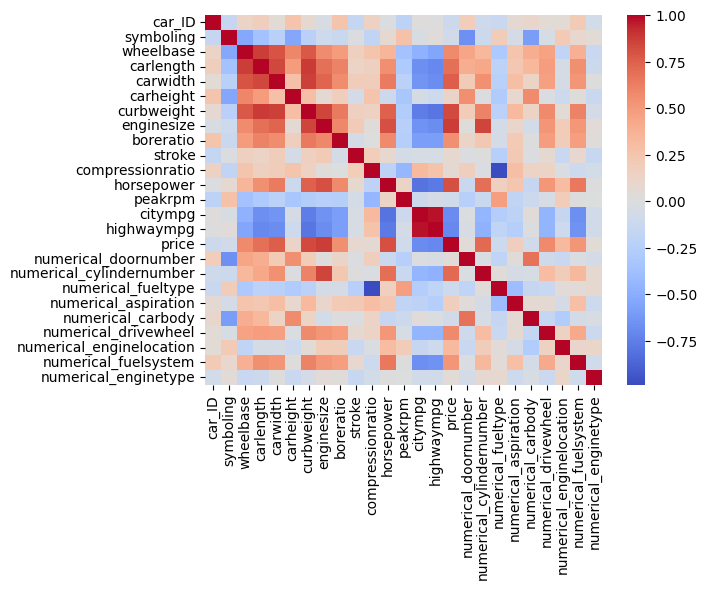

In [10]:
cols = df.columns

corr = df.corr()

sns.heatmap(corr, cmap='coolwarm')

In [23]:
# Normalise the data
scaler = StandardScaler()
mean_price = df.price.mean()
price_standard_deviation = df.price.std()
df_standardised = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [50]:
X_features = ['curbweight', 'enginesize', 'horsepower', 'citympg',]
X = df_standardised[X_features]
Y = df_standardised.price

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [52]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [53]:
Y_pred = lr_model.predict(X_test)
rmse = root_mean_squared_error(Y_pred, Y_test)
rmse

np.float64(0.42032710779096255)

In [54]:
mae = mean_absolute_error(Y_pred, Y_test)
mean_price + mae * price_standard_deviation

np.float64(15750.138644363189)